In [1]:
import os
os.environ["OPENAI_DEFAULT_MODEL"] = 'gpt-4o-mini'

In [2]:

!pip install yfinance matplotlib

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt

ticker = "NVDA"
df = yf.download(ticker, start="2024-05-01", end="2024-05-26")

/tmp/ipykernel_29497/1393723561.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2024-05-01", end="2024-05-26")
[*********************100%***********************]  1 of 1 completed


In [4]:

df.head()


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2024-05-01,83.007950,85.965772,81.222658,85.043143,559863000
2024-05-02,85.782852,86.202683,83.166889,84.415393,377898000
2024-05-03,88.753670,89.245471,87.005365,87.754068,398341000
2024-05-06,92.103325,92.183295,89.019554,89.354419,376203000
2024-05-07,90.517960,91.744469,88.975574,91.061742,437342000


In [5]:

df.tail()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2024-05-20,94.742287,95.162118,93.402824,93.712698,318764000
2024-05-21,95.348045,95.362040,93.142922,93.561754,328946000
2024-05-22,94.912216,95.981790,93.211897,95.421016,548648000
2024-05-23,103.757706,106.277699,101.479605,101.987407,835065000
2024-05-24,106.426643,106.432638,102.959022,104.407443,429494000


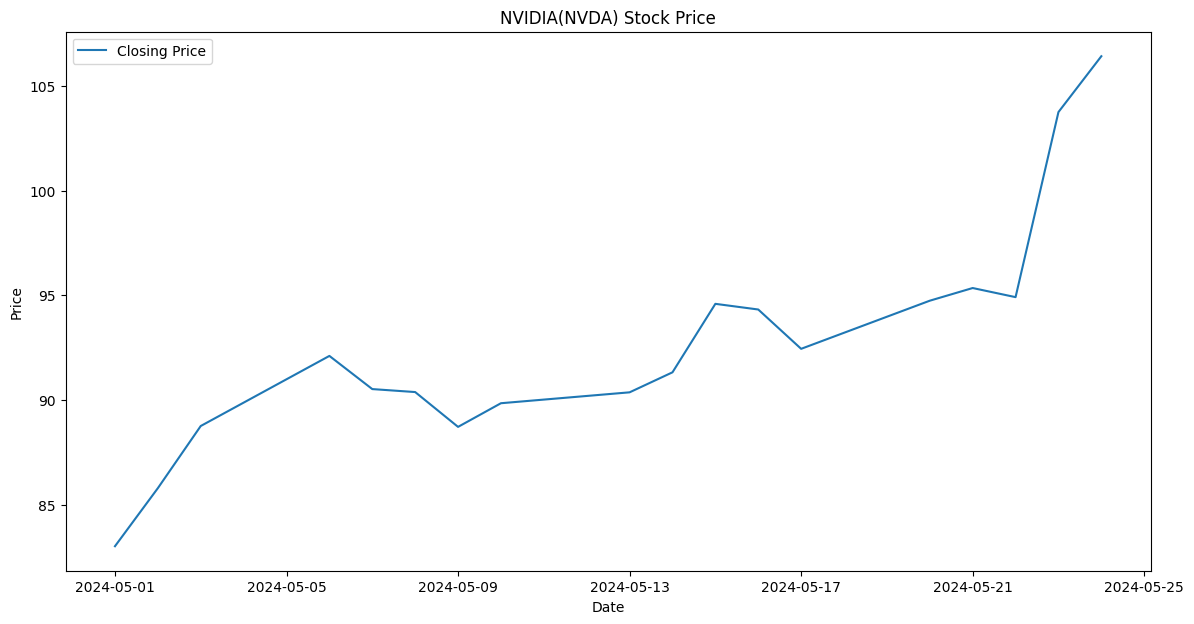

In [6]:
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Closing Price')
plt.title('NVIDIA(NVDA) Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [7]:

df.rename(columns={
    'Open': '시가',
    'High': '고가',
    'Low': '저가',
    'Close': '종가',
    'Adj Close': '수정 종가',
    'Volume': '거래량'
}, inplace=True)

df.rename_axis('날짜', inplace=True)

In [8]:

df.head()


Price,종가,고가,저가,시가,거래량
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
날짜,,,,,
2024-05-01,83.007950,85.965772,81.222658,85.043143,559863000
2024-05-02,85.782852,86.202683,83.166889,84.415393,377898000
2024-05-03,88.753670,89.245471,87.005365,87.754068,398341000
2024-05-06,92.103325,92.183295,89.019554,89.354419,376203000
2024-05-07,90.517960,91.744469,88.975574,91.061742,437342000


In [9]:

from io import StringIO
csv_buffer = StringIO()
df.to_csv(csv_buffer)

csv_data = csv_buffer.getvalue()
print(csv_data)

Price,종가,고가,저가,시가,거래량
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
날짜,,,,,
2024-05-01,83.00794982910156,85.96577177323404,81.22265755025684,85.04314260728708,559863000
2024-05-02,85.78285217285156,86.20268321187375,83.16688916320159,84.41539269757547,377898000
2024-05-03,88.75366973876953,89.24547072408387,87.00536516764065,87.75406766785412,398341000
2024-05-06,92.10332489013672,92.18329487804908,89.01955372837045,89.35441947310096,376203000
2024-05-07,90.51795959472656,91.74446861486086,88.97557445393352,91.06174179688814,437342000
2024-05-08,90.37602996826172,91.15771651229316,89.38442026659783,89.44739873915937,325721000
2024-05-09,88.71168518066406,91.03575690690285,88.19589167973308,90.49297372342349,378013000
2024-05-10,89.84223937988281,91.36463606067683,89.19149741137822,90.26907144547987,335325000
2024-05-13,90.36302947998047,90.96179014293932,88.49377086608031,90.44199279647063,289680000
2024-05-14,91.31965637207031,91.61453717454157,88.89861527885883,89.56335162049751,296507000
2024-05-

In [10]:

!pip install openai

In [11]:

import os
import openai

openai.api_key = os.getenv("OPENAI_API_KEY")

response = openai.chat.completions.create(
  model=os.getenv("OPENAI_DEFAULT_MODEL"),
  messages=[
    {
      "role": "system",
      "content": "다음은 엔비디아의 날짜별 주가 데이터야. 이 데이터를 분석해서 보고해줘."
    },
    {
      "role": "user",
      "content": csv_data
    }
  ],
  temperature=0,
  max_tokens=1024,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0
)

print(response.choices[0].message.content)

엔비디아(NVDA)의 2024년 5월 주가 데이터를 분석한 결과는 다음과 같습니다.

### 1. 주가 동향
- **시작가**: 2024년 5월 1일의 종가는 약 83.01달러로 시작했습니다.
- **최고가**: 5월 23일에 103.76달러로 최고가를 기록했습니다.
- **최저가**: 5월 1일에 81.22달러로 최저가를 기록했습니다.
- **종가**: 5월 24일의 종가는 106.43달러로, 한 달 동안의 상승세를 보여줍니다.

### 2. 가격 변화
- **5월 1일 ~ 5월 24일**: 주가는 83.01달러에서 106.43달러로 약 28.2% 상승했습니다.
- **주간 변동성**: 주가의 변동폭이 크며, 특히 5월 23일에 급격한 상승이 있었습니다.

### 3. 거래량
- **거래량**: 5월 23일에는 835,065,000주가 거래되어 가장 높은 거래량을 기록했습니다. 이는 주가 상승과 관련이 있을 수 있습니다.
- **거래량 추세**: 전반적으로 거래량이 증가하는 추세를 보이며, 특히 주가가 급등한 날에 거래량이 급증했습니다.

### 4. 주요 날짜
- **5월 15일**: 94.59달러로 종가가 상승하며, 이후 주가가 계속해서 상승세를 유지했습니다.
- **5월 23일**: 주가가 103.76달러로 급등하며, 이 날의 거래량이 가장 많았습니다.

### 5. 결론
엔비디아의 2024년 5월 주가는 전반적으로 상승세를 보였으며, 특히 중순 이후 급격한 상승이 있었습니다. 거래량 또한 주가 상승과 함께 증가하는 경향을 보였습니다. 이러한 데이터는 엔비디아의 긍정적인 시장 반응을 나타내며, 향후 주가에 대한 긍정적인 전망을 시사합니다.
